# EDA of Financial Datasbase

This notebook is for the Exploratory Data Analysis on the customer loans dataset. 

## Necessary imports

In [1]:
import pandas as pd
from db_utils import create_df
from transformations import DataTransform, DataFrameInfo, Plotter

## Loading the Dataset
The create_df function is used to extract and load the AWS RDS into a pandas dataframe. This allows me to use the dataframe for EDA techniques. 

In [2]:
loan_df = pd.read_csv('loan_payments.csv')

## Data Cleaning
### Checking colunm datatypes
To start, I did df.info() and df.head() to get information about the datatypes and compare it with the actual values in the dataset. I noticed colunmns which were dates were not in teh date format, so I wrote a method in the DataTranform class to convert this. Also, I noticed some categorical colunms had numercal data but where in the object datatype, such as term and employment length. However, it would be useful to convert this to numercal datatypes so that they can easily be used for analysis.  

<img src="images/term_col.png" alt="Term column screenshot" height="150"> <img src="images/employment_length_col.png" alt="Employment length column screenshot" height="150">

In [3]:
df_transform = DataTransform()
df_transform.date_format(loan_df,'issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date')
df_transform.numeric_format(loan_df, 'term','months')
df_transform.employment_number_system(loan_df, 'employment_length')

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,0.00,0.00,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,0.00,0.00,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36.0,9.01,159.03,B,B2,...,0.00,0.00,2016-07-01,160.61,NaT,2016-07-01,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36.0,10.59,162.73,C,C2,...,0.00,0.00,2016-10-01,490.01,NaT,2016-09-01,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36.0,7.43,155.38,A,A2,...,0.00,0.00,2014-03-01,0.00,NaT,2013-05-01,NaN,NaN,1,INDIVIDUAL


Getting information from dataframe 

DataFrame data types:
 id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                                  float64
int_rate                              float64
instalment                            float64
grade                                  object
sub_grade                              object
employment_length                     float64
home_ownership                         object
annual_inc                            float64
verification_status                    object
issue_date                     datetime64[ns]
loan_status                            object
payment_plan                           object
purpose                                object
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6m

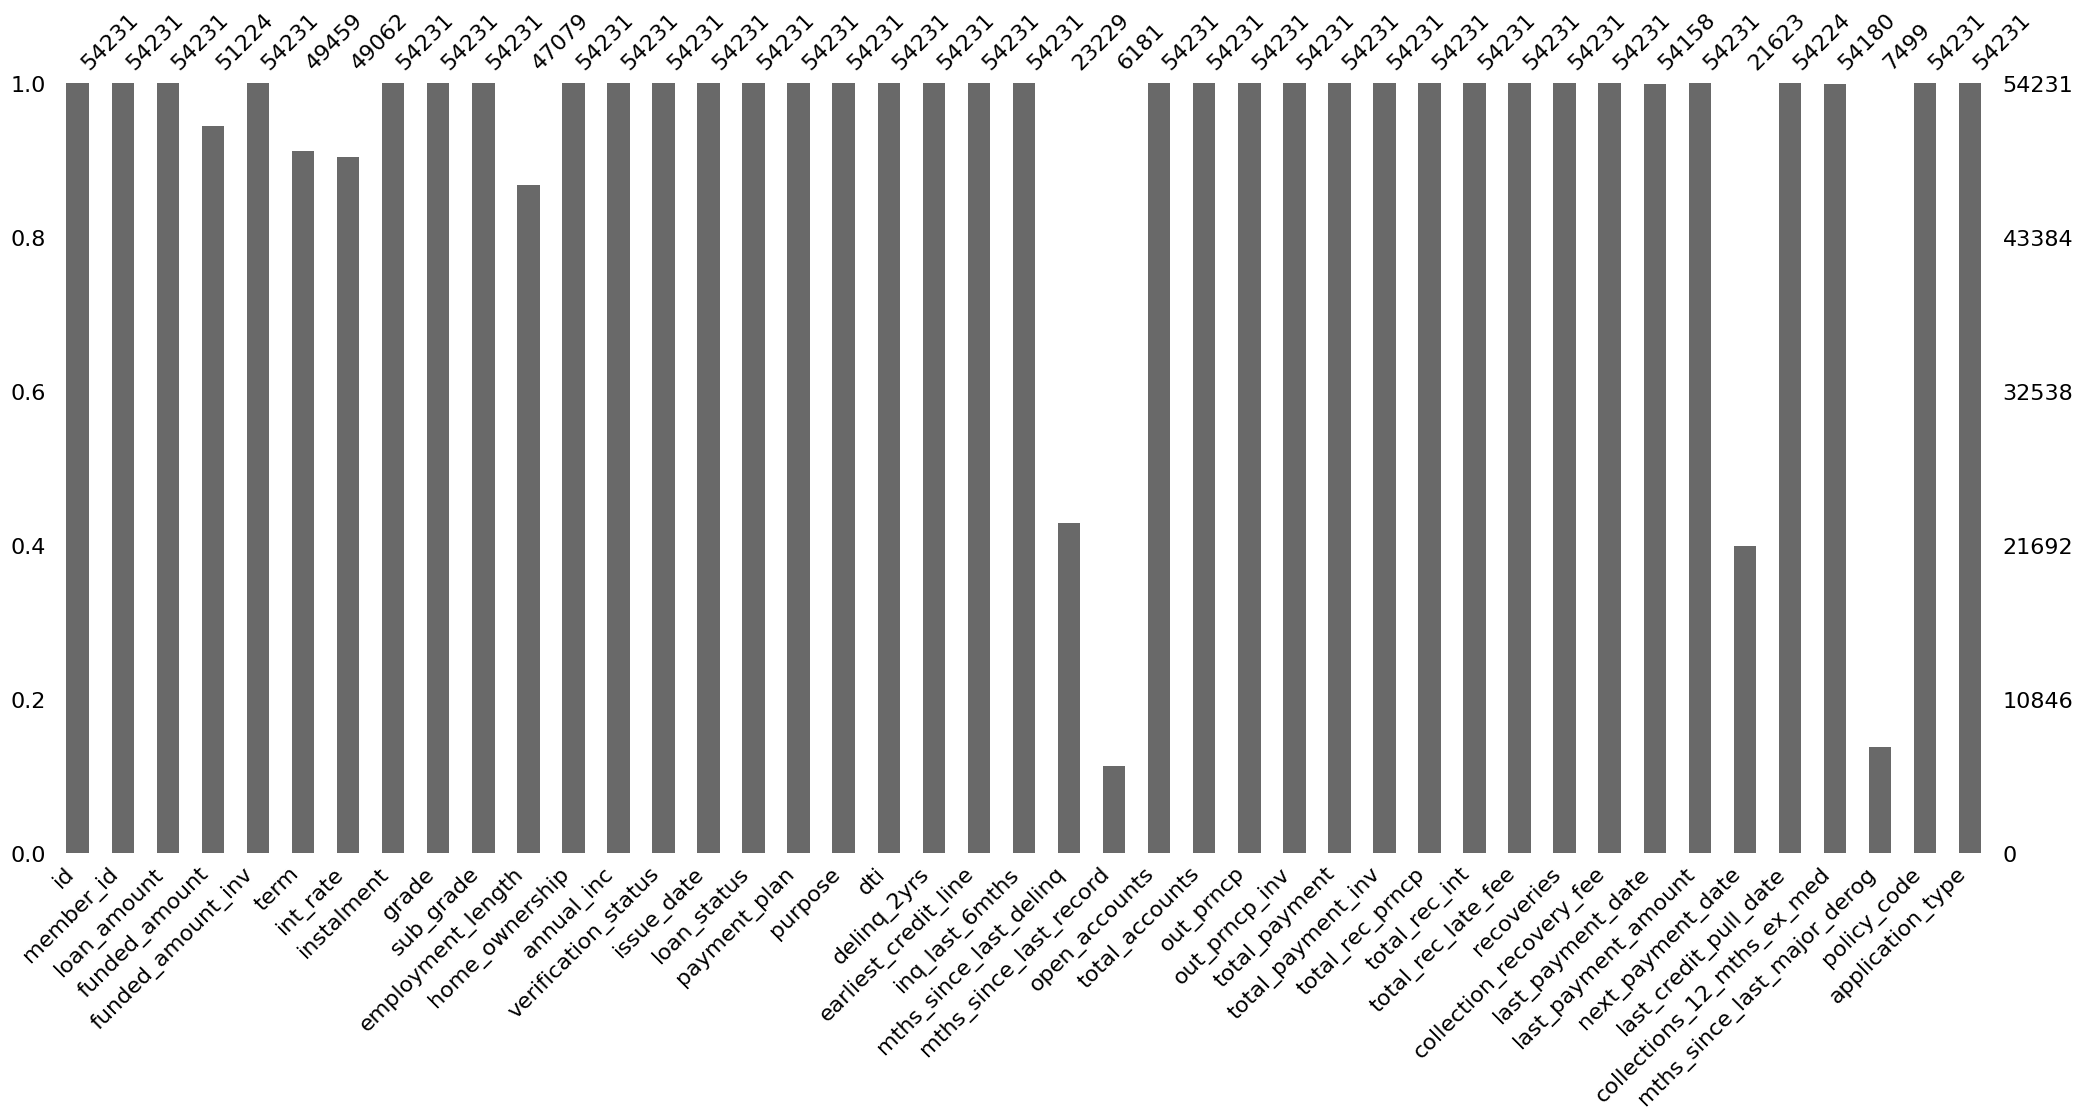

In [4]:
df_info = DataFrameInfo()
df_info.df_data_types(loan_df)
df_info.categorical_distinct_values(loan_df)
df_info.df_shape(loan_df)
df_info.df_null_percent(loan_df)
df_plot = Plotter()
df_plot.plot_null(loan_df)

## Removing and imputing missing values in data
I decided to remove columns with percenatage null values of over 50% because the lack of data can cause errors in statistical analysis and cause biased results.

Columns with high percentage null vlaues:
- mths_since_last_delinq - 57.17
- mths_since_last_record - 88.60
- next_payment_date - 60.13
- mths_since_last_major_derog - 86.17

In [5]:
loan_df = loan_df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog'], axis=1)

For colunms with low percentage of null values, I imputed the missing values for the numerical data types based on exisiting data. This will help produce a complete dataset which will allow use of statistical analysis while preserving the sample size.

The distributions mean value was used for continous data and median value was used for categorical data. To do this, I add methods impute_data_mean and impute_data_median in the DataTranform class to impute data with the mean and median values, respectively. 

Columns with low percentage null vlaues:
- funded_amount - 5.54
- term - 8.80
- int_rate - 9.53
- employment_length - 13.19
- last_payment_date - 0.13
- last_credit_pull_date - 0.01
- collections_12_mths_ex_med - 0.09

Datetime datatypes are very difficult to infer and impute. As the percentage of null values are very low and my sample size is over 5000, I decided to remove these rows from the dataset. 

In [6]:
df_info.column_basic_statistics(loan_df,'funded_amount', 'term', 'int_rate', 'employment_length','collections_12_mths_ex_med')

funded_amount: Mean=13229.51, Median=12000.0, Mode=10000.0, Standard deviation=8019.02
term: Mean=42.61, Median=36.0, Mode=36.0, Standard deviation=10.72
int_rate: Mean=13.51, Median=13.16, Mode=11.99, Standard deviation=4.39
employment_length: Mean=7.3, Median=7.0, Mode=11.0, Standard deviation=3.3
collections_12_mths_ex_med: Mean=0.0, Median=0.0, Mode=0.0, Standard deviation=0.07


In [7]:
df_transform.impute_data_mean(loan_df, 'funded_amount', 'int_rate')
df_transform.impute_data_median(loan_df, 'term', 'employment_length', 'collections_12_mths_ex_med')

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36.0,9.01,159.03,B,B2,...,724.82,0.000000,0.00,0.00,2016-07-01,160.61,2016-07-01,0.0,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36.0,10.59,162.73,C,C2,...,826.31,104.942381,0.00,0.00,2016-10-01,490.01,2016-09-01,0.0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36.0,7.43,108.77,A,A2,...,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36.0,7.43,155.38,A,A2,...,174.18,0.000000,0.00,0.00,2014-03-01,0.00,2013-05-01,0.0,1,INDIVIDUAL


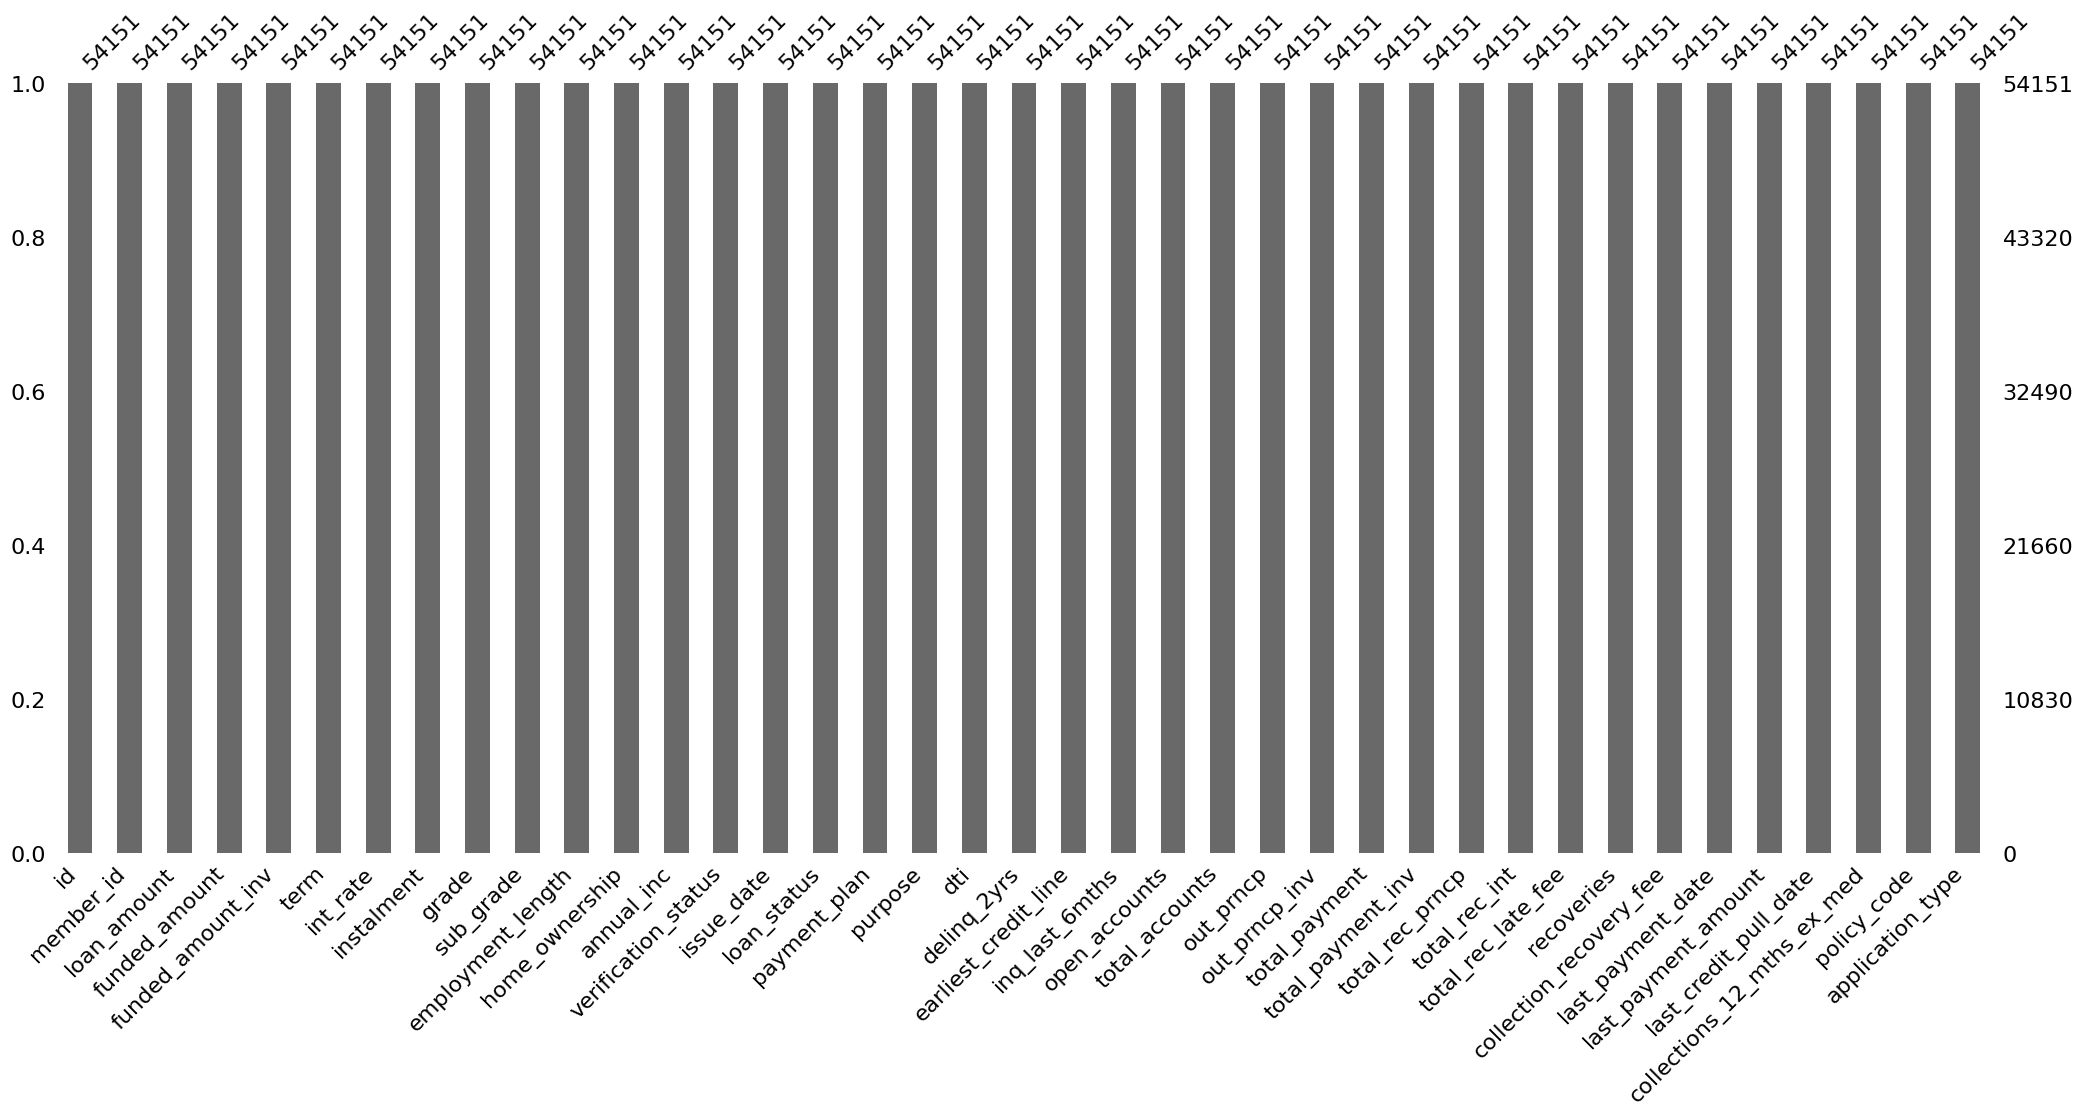

In [8]:
loan_df = loan_df.dropna(axis=0)

df_plot.plot_null(loan_df)

In [9]:
numeric_cols = loan_df.select_dtypes(include=['number'])
print(numeric_cols.skew().sort_values(ascending=False))

collection_recovery_fee       27.807754
collections_12_mths_ex_med    20.307695
recoveries                    14.389299
total_rec_late_fee            13.174553
annual_inc                     8.717500
delinq_2yrs                    5.376385
inq_last_6mths                 3.253523
last_payment_amount            2.497220
id                             2.370227
out_prncp_inv                  2.354471
out_prncp                      2.354051
member_id                      2.205248
total_rec_int                  2.204585
total_payment                  1.269875
total_rec_prncp                1.262679
total_payment_inv              1.257870
term                           1.147782
open_accounts                  1.059184
instalment                     0.996572
funded_amount                  0.845308
funded_amount_inv              0.813376
loan_amount                    0.804922
total_accounts                 0.779040
int_rate                       0.433296
dti                            0.189101


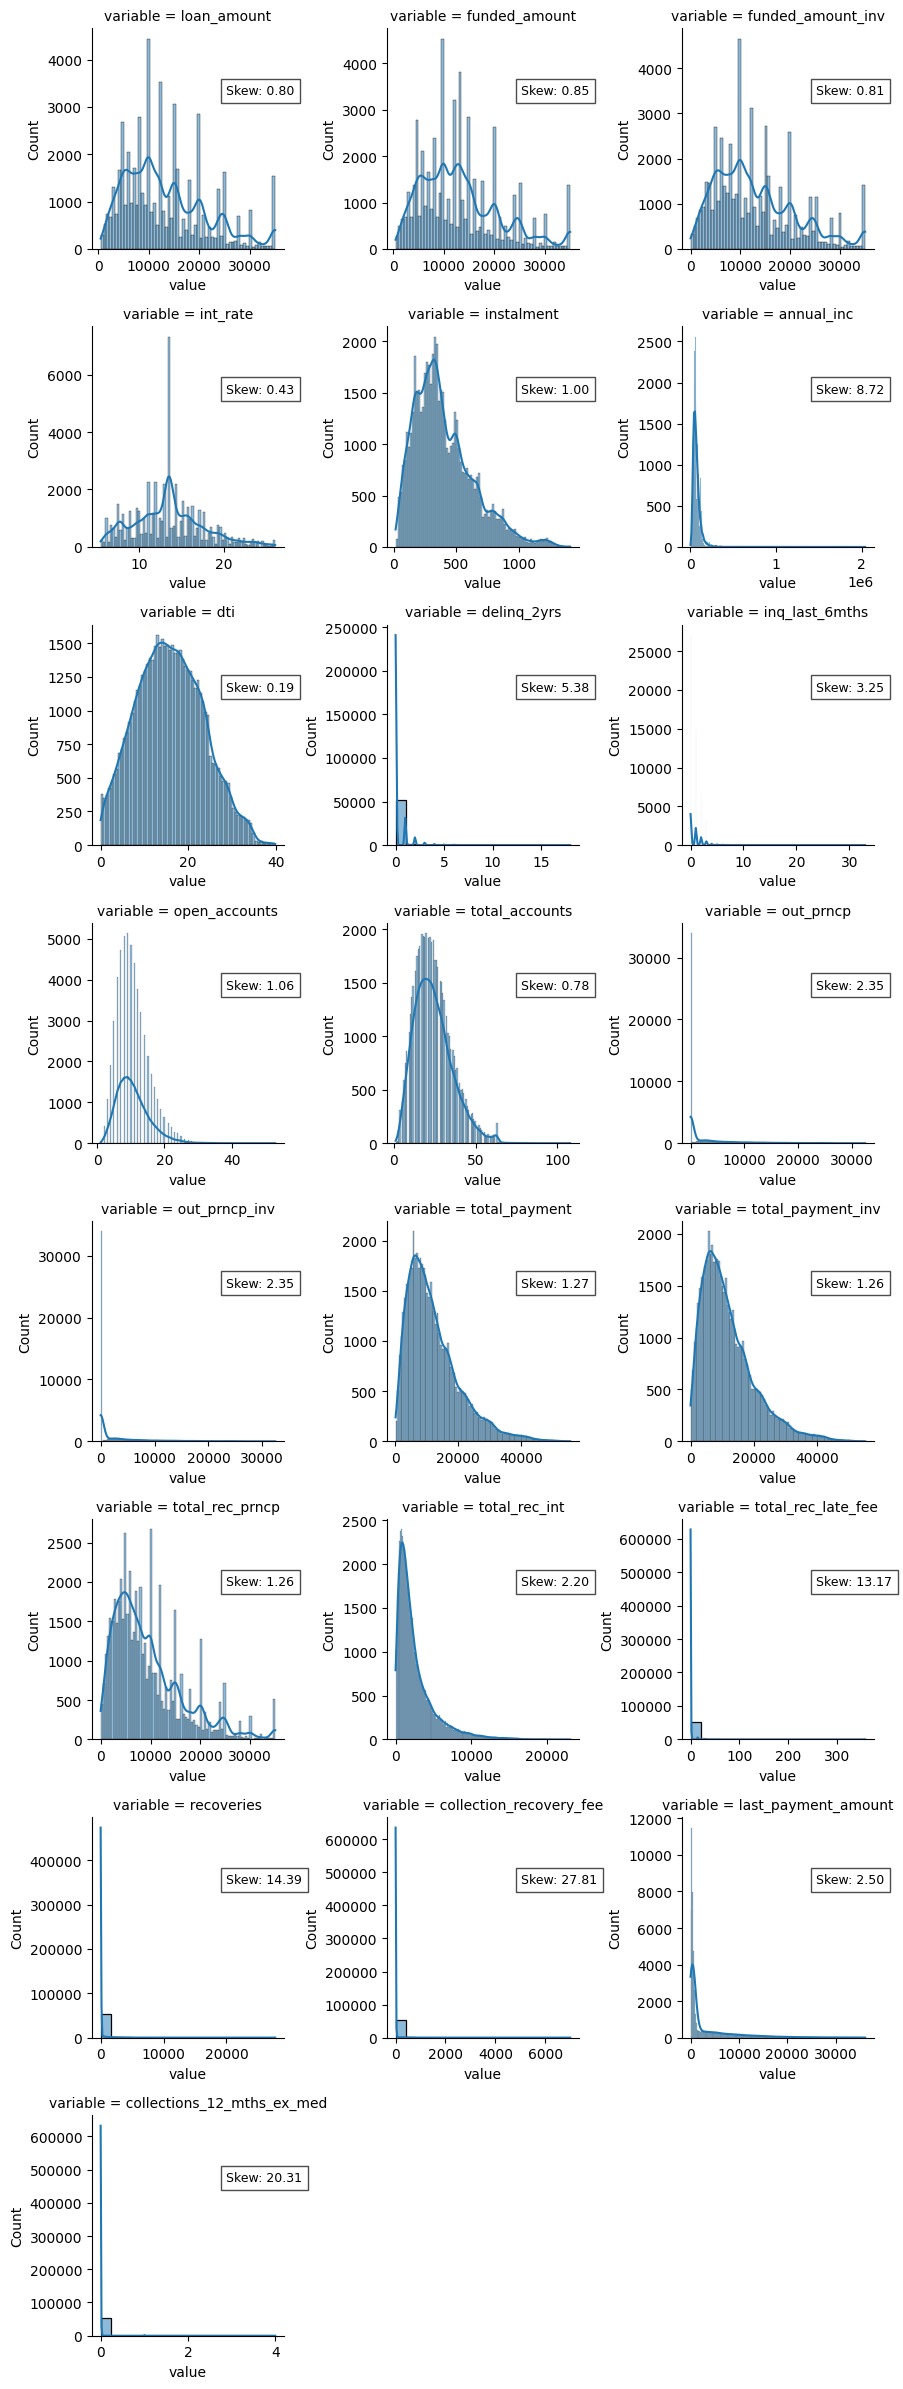

In [10]:
df_plot.plot_kde_all_grid(loan_df)

cols_to_transform = ['collection_recovery_fee', 
                  'collections_12_mths_ex_med', 
                  'recoveries', 
                  'total_rec_late_fee', 
                  'annual_inc',
                  'delinq_2yrs', 
                  'inq_last_6mths', 
                  'last_payment_amount',
                    'out_prncp_inv', 
                    'out_prncp', 
                    'total_rec_int', 
                    'total_payment',
                   'total_rec_prncp',
                     'total_payment_inv', 
                     'open_accounts'  ]

Skew threshold -1 to 1, within 0.5/-0.5 is normal distribution, outisde 0.5/-0.5 moderately skewed. 

Skew value outside of -1 to 1 range

| Columns                    | Skew vlaue  | 
|----------------------------|-------------|
| collection_recovery_fee    |  27.81      |  
| collections_12_mths_ex_med |  20.31      |  
| recoveries                 |  14.39      | 
| total_rec_late_fee         |  13.17      |  
| annual_inc                 |  8.72       | 
| delinq_2yrs                |  5.38       | 
| inq_last_6mths             |  3.25       | 
| last_payment_amount        |  2.50       |  
| out_prncp_inv              |  2.35       |  
| out_prncp                  |  2.35       | 
| total_rec_int              |  2.20       | 
| total_payment              |  1.27       |  
| total_rec_prncp            |  1.26       | 
| total_payment_inv          |  1.26       |  
| open_accounts              |  1.06       |

I want to compare whether a log tranform or square root tranform is better for fixing the skewness. 

In [11]:
#Create copies of original dataframe
loan_log = loan_df.copy()
loan_sqrt = loan_df.copy()


#Create dictionaries to store skew values after transfomration 
original_skew = dict(loan_df[cols_to_transform].skew())
log_dict = {}
sqrt_dict = {}

#Do log tranform and add the values to empty log dictionary 
loan_log = df_transform.correct_skew_log_transform(loan_log, cols_to_transform)

log_skews = loan_log[cols_to_transform].skew()
log_dict.update(log_skews.items())

#Do square root tranform and add the values to empty sqrt dictionary 
loan_sqrt = df_transform.correct_skew_sqrt(loan_sqrt, cols_to_transform)

sqrt_skews = loan_sqrt[cols_to_transform].skew()
sqrt_dict.update(sqrt_skews.items())

#Create a table to easily compare the tranformed skew values  
skew_values_table=pd.DataFrame([original_skew, log_dict, sqrt_dict]).transpose()
skew_values_table = skew_values_table.rename(columns={0:'original', 1:'log_transform', 2:'square_root_transform'})
skew_values_table

/Users/hosnashams/Desktop/AI-Core/eda-project/EDA-Customer-Loans/transformations.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69314718 0.         0.         ... 0.         0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[:, col] = dataframe[col].map(lambda i: np.log(i) if i > 0 else 0.0)
/Users/hosnashams/Desktop/AI-Core/eda-project/EDA-Customer-Loans/transformations.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         ... 0.         0.         1.38629436]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[:, col] = dataframe[col].map(lambda i: np.log(i) if i > 0 else 0.0)
/Users/hosnashams/Desktop/AI-Core/eda-project/EDA-Customer-Loans/transformations.py:40: FutureWarnin

,original,log_transform,square_root_transform
collection_recovery_fee,27.807754,5.414865,9.499770
collections_12_mths_ex_med,20.307695,65.059837,16.566115
recoveries,14.389299,3.820434,5.884665
total_rec_late_fee,13.174553,5.505069,6.272106
annual_inc,8.717500,0.139203,1.932296
delinq_2yrs,5.376385,5.415423,2.359431
inq_last_6mths,3.253523,1.971073,0.553449
last_payment_amount,2.497220,0.128038,1.436956
out_prncp_inv,2.354471,0.574866,1.222758
out_prncp,2.354051,0.574792,1.222407


From the skew vlaues table, I can easily which tranform method gives better results for each colunm that needs to corrected. 
I created a new copy of the loan datatframe to with the transformed colunms so keep the original dataframe clean. 

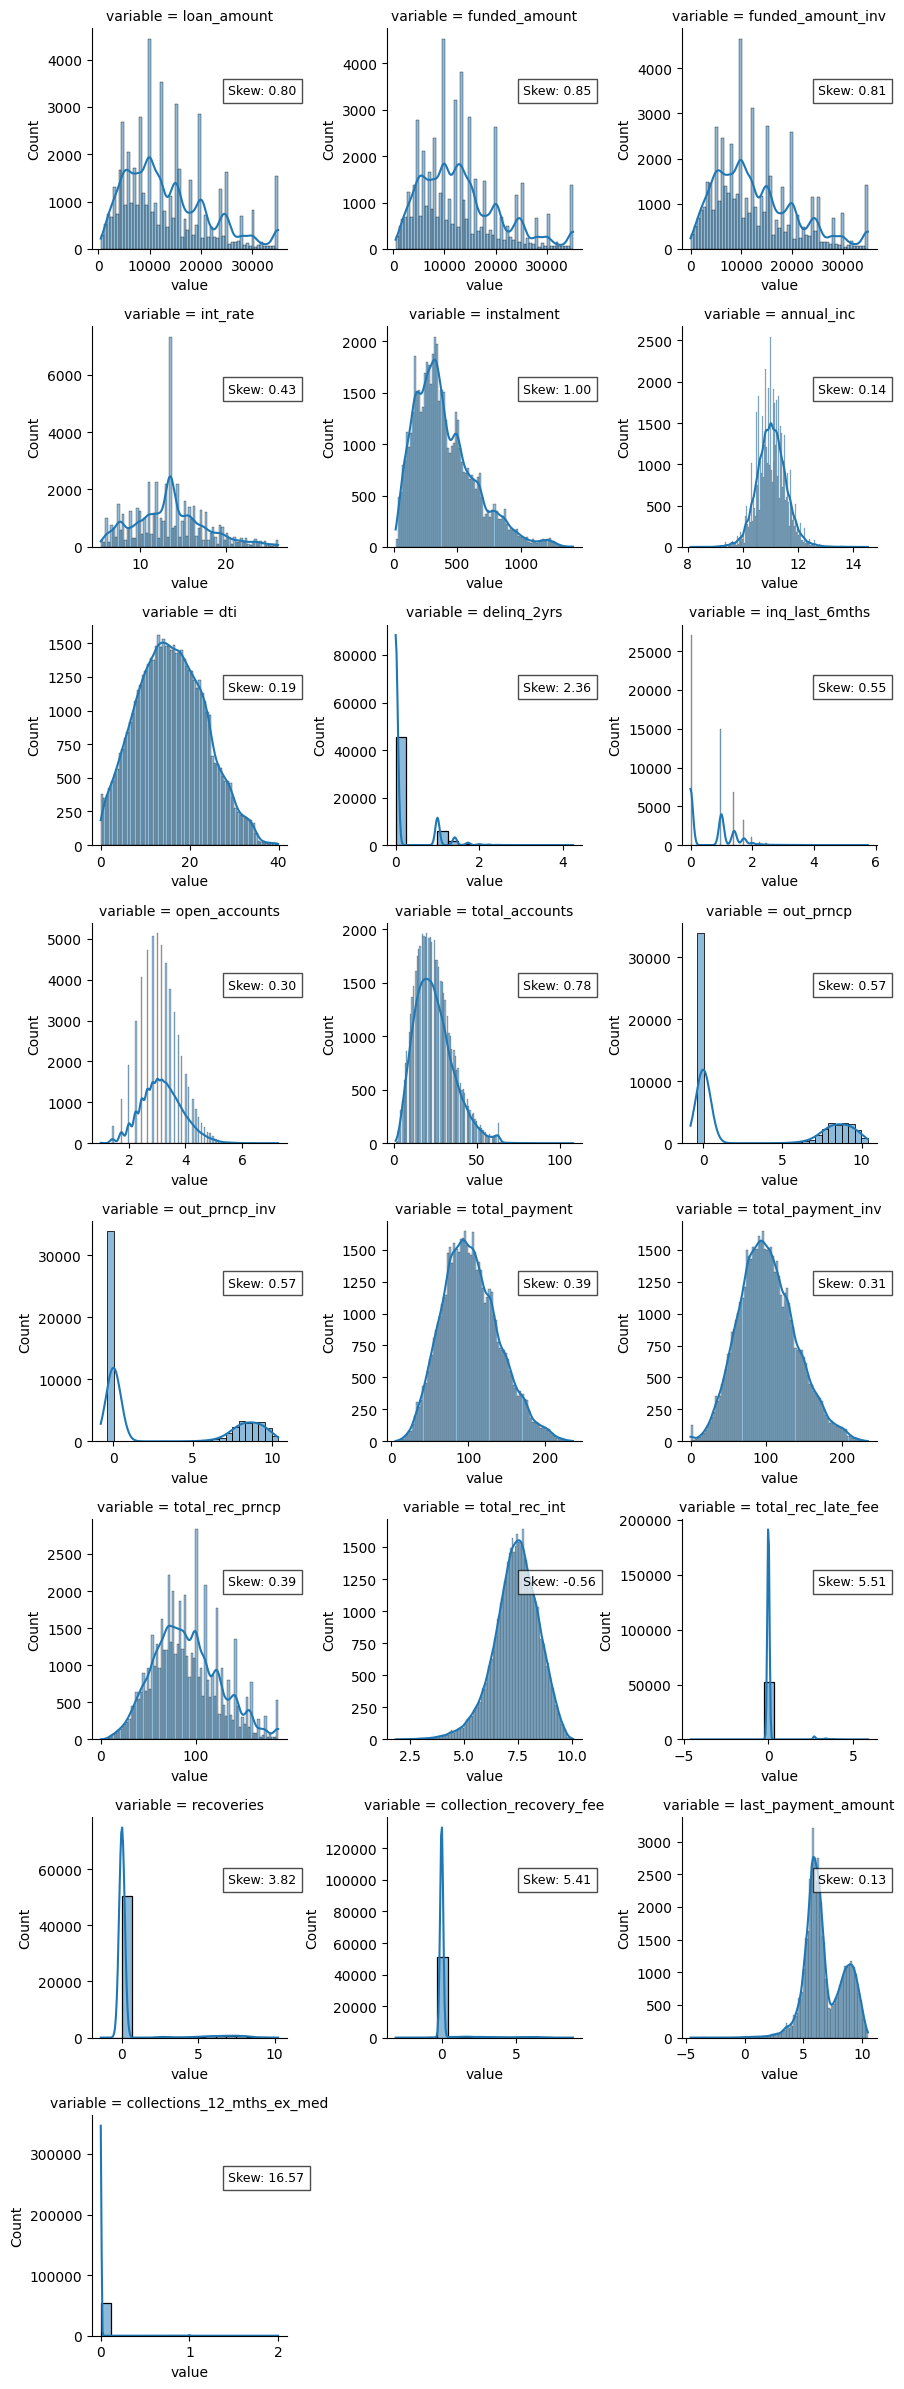

In [12]:
loan_transformed = loan_df.copy()

df_transform.correct_skew_log_transform(loan_transformed, 'collection_recovery_fee','recoveries', 'total_rec_late_fee', 'annual_inc', 'last_payment_amount', 'out_prncp_inv', 'out_prncp', 'total_rec_int') 
df_transform.correct_skew_sqrt(loan_transformed,'collections_12_mths_ex_med','delinq_2yrs', 'inq_last_6mths', 'total_payment', 'total_rec_prncp', 'total_payment_inv', 'open_accounts')

df_plot.plot_kde_all_grid(loan_transformed)


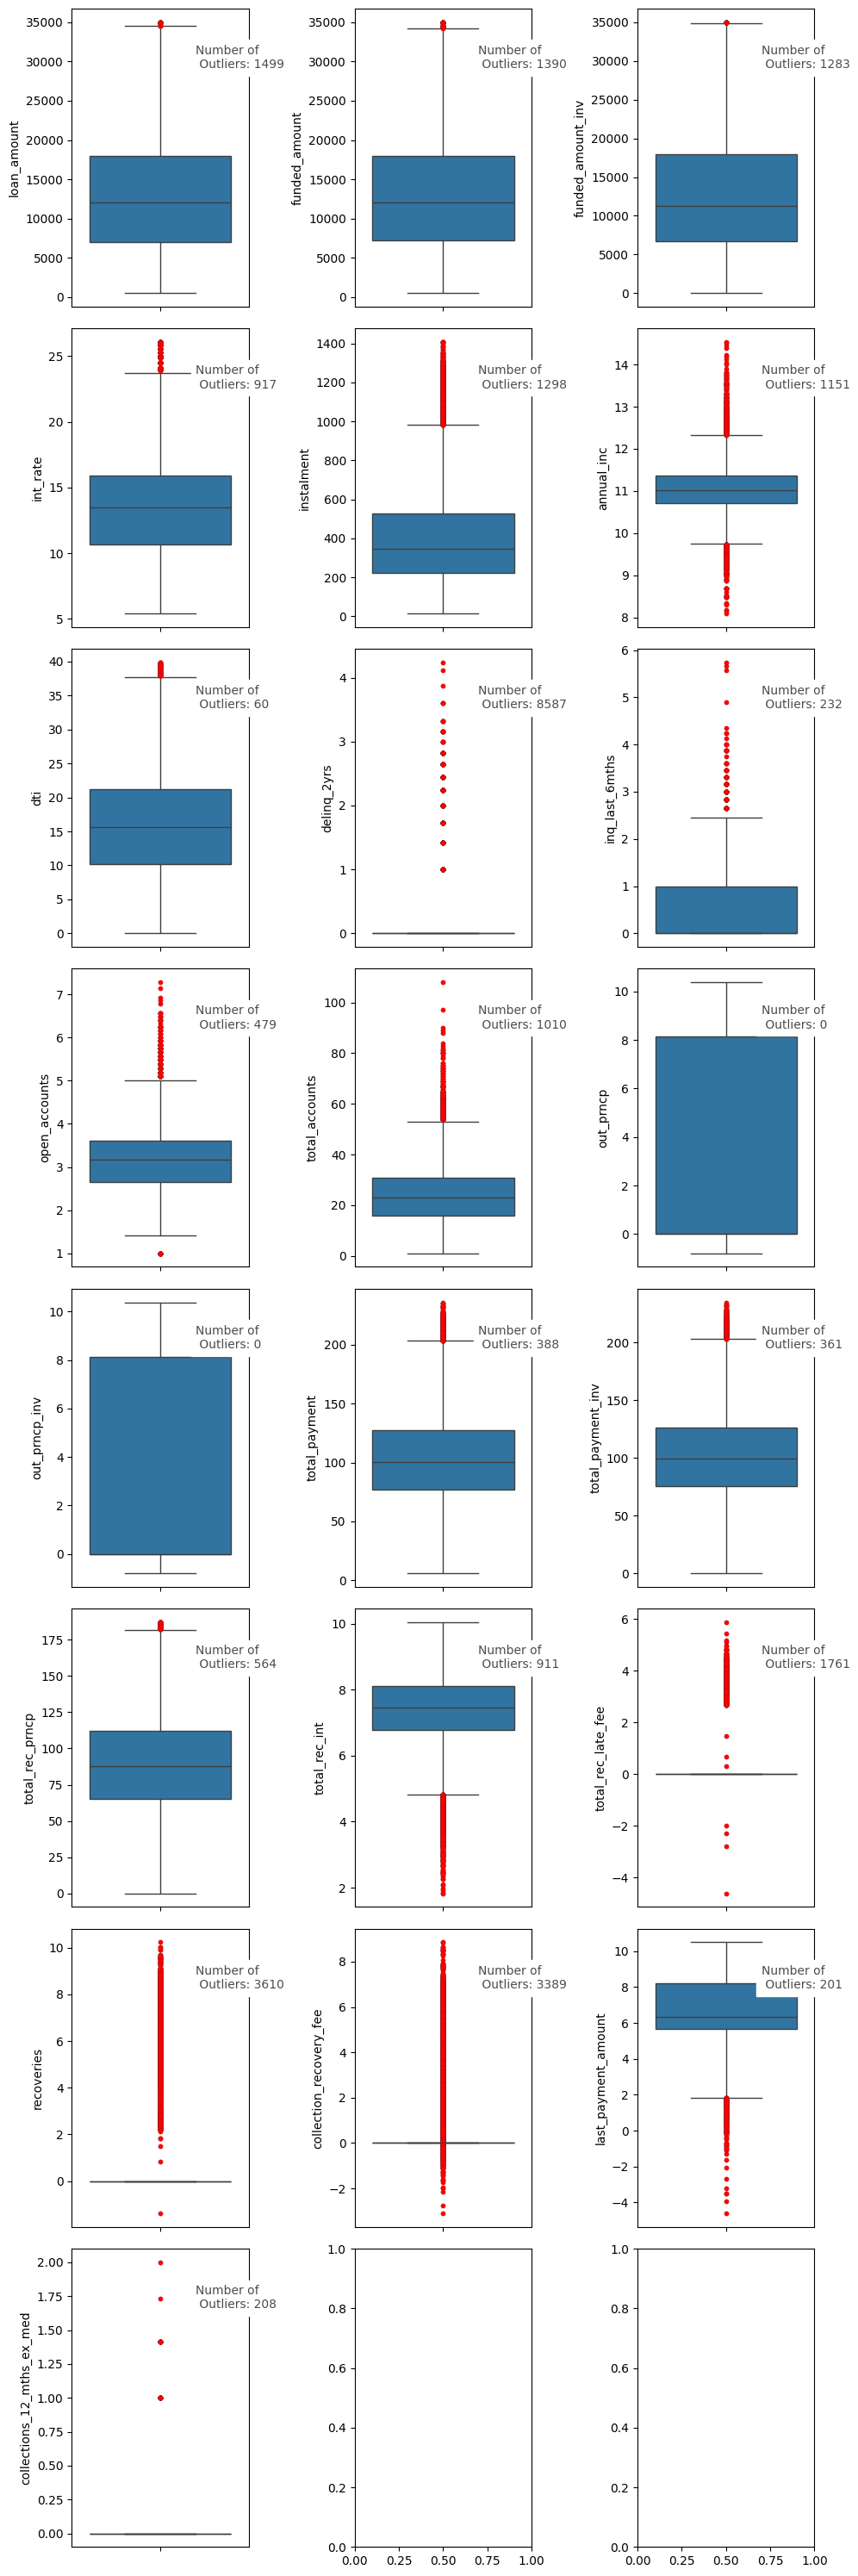

In [ ]:

df_plot.plot_box_plot_all(loan_transformed, 'loan_amount', 'funded_amount', 'funded_amount_inv',
       'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 
       'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 
       'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_payment_amount', 'collections_12_mths_ex_med')